<img src='bacchanal.png'>

In [1]:
##Library Importing
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df_restaurant=pd.read_csv("restaurant.csv")

In [3]:
df_restaurant.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [4]:
## we take the columns we will analyze
df=df_restaurant[['stars','text']]

<AxesSubplot:xlabel='stars', ylabel='count'>

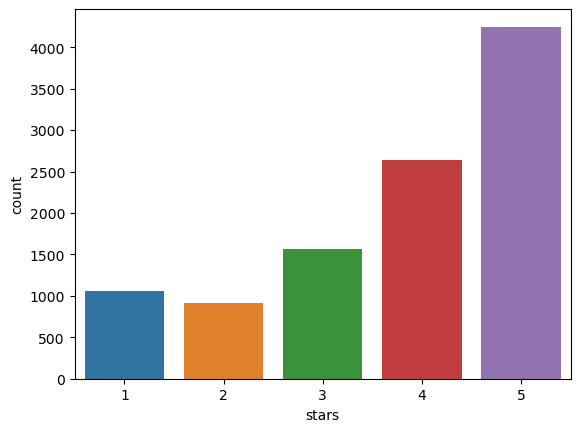

In [5]:
## looking at charts by stars
sns.countplot(x=df['stars'])

In [6]:
df.stars.value_counts().sort_values(ascending=False)

5    4247
4    2636
3    1561
1    1056
2     917
Name: stars, dtype: int64

In [7]:
df.head()

,stars,text
0,5,After getting food poisoning at the Palms hote...
1,4,"""A feast worthy of Gods""\n\nBaccarnal Buffet i..."
2,4,The crab legs are better than the ones at Wick...
3,1,Not worth it! Too salty food and expensive! Th...
4,5,I would give this infinite stars if I could. M...


# Bir NLP Projesine başlarken Dikkat Edilmesi Gerekenler

In [8]:
df['text']=df['text'].str.lower()

In [9]:
df['text']=df['text'].str.replace('[^\w\s]','') ##

In [10]:
df['text']=df['text'].str.replace('\d+','')

In [11]:
df['text']=df['text'].str.replace('\n','')
df['text']=df['text'].str.replace('\r','')

In [12]:
df.text[0]

'after getting food poisoning at the palms hotel i was scared to eat at any more buffets but we figured with the high price tag the positive reviews etc it was worth a chance im really glad we gave it a try btw i uploaded a collage of the things we atethe seafood line is by the far the longest i would not recommend showing up in heels if youre female my feet were killing me between the line at the door the line to get sat and the seafood line totally worth it thoughthe prime rib was the best ive ever hadi loved the sweet potato totsi even have phothe music was great and so was our server alma  he was a older gentleman with a mustache and was very attentive and delightfuli will return next trip in more comfortable shoes after a horrible visit at the palms with non stop issues in a matter of  hours your establishment was truly the high light of our trip thank you for an exquisite dinner'

In [13]:
df.loc[df['stars']==3,"sentiment"]="neutral"
df.loc[df['stars']<3,"sentiment"]="negative"
df.loc[df['stars']>3,"sentiment"]="positive"

In [14]:
df.head()

,stars,text,sentiment
0,5,after getting food poisoning at the palms hote...,positive
1,4,a feast worthy of godsbaccarnal buffet in caes...,positive
2,4,the crab legs are better than the ones at wick...,positive
3,1,not worth it too salty food and expensive this...,negative
4,5,i would give this infinite stars if i could my...,positive


<AxesSubplot:xlabel='sentiment', ylabel='count'>

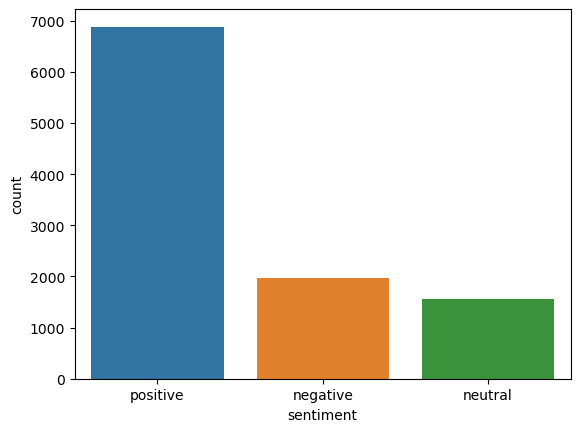

In [15]:
sns.countplot(df['sentiment'])

In [16]:
## which message for Lang ( Language Detection )
from langdetect import detect_langs
language = [detect_langs(i) for i in df.text]
languages = [str(i[0]).split(':')[0] for i in language]
df['language'] = languages

In [17]:
df.head()

,stars,text,sentiment,language
0,5,after getting food poisoning at the palms hote...,positive,en
1,4,a feast worthy of godsbaccarnal buffet in caes...,positive,en
2,4,the crab legs are better than the ones at wick...,positive,en
3,1,not worth it too salty food and expensive this...,negative,en
4,5,i would give this infinite stars if i could my...,positive,en


<AxesSubplot:xlabel='language', ylabel='count'>

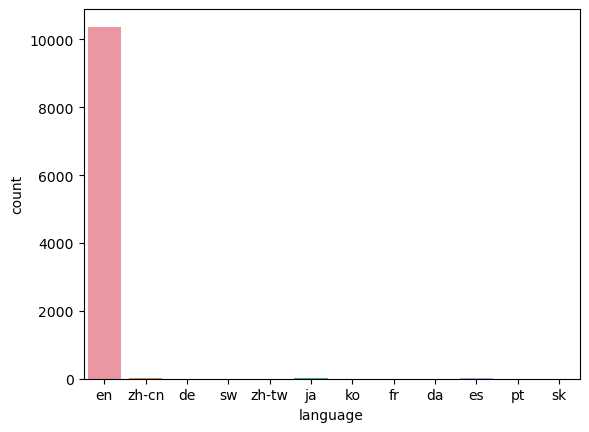

In [18]:
sns.countplot(df['language'])

In [19]:
# Sadece İngilizce Olanları Alıoruz.
df=df[df['language']=='en']
df.reset_index(drop=True,inplace=True)

<AxesSubplot:xlabel='language', ylabel='count'>

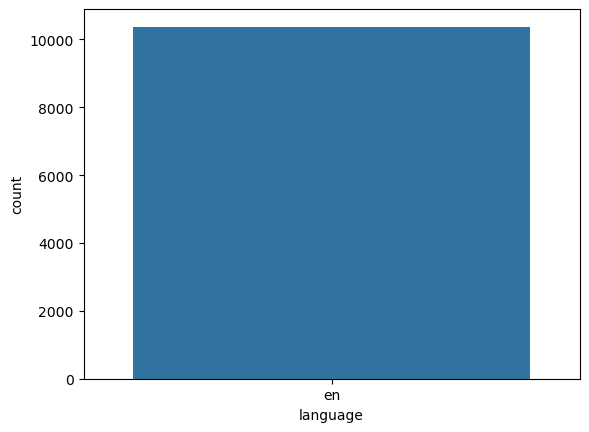

In [20]:
sns.countplot(df['language'])

In [21]:
x,y=df['text'],df['sentiment']

In [25]:
y.head()

0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object

In [23]:
df.head()

,stars,text,sentiment,language
0,5,after getting food poisoning at the palms hote...,positive,en
1,4,a feast worthy of godsbaccarnal buffet in caes...,positive,en
2,4,the crab legs are better than the ones at wick...,positive,en
3,1,not worth it too salty food and expensive this...,negative,en
4,5,i would give this infinite stars if i could my...,positive,en


In [22]:
x.shape,y.shape,df.shape

((10374,), (10374,), (10374, 4))

In [26]:
def fnc_all_models_tokenizer(vect,x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier  
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)
    
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
    
    g=GaussianNB()
    b=BernoulliNB()
    SVC=SVC()
    KN=KNeighborsClassifier()
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGBC=XGBClassifier()
    
    algos=[g,b,SVC]
    algo_names=['GaussianNB','BernoulliNB','SVC']
    
    
    accuracy_scored=[]    
        
    x_train_dtm=vect.fit_transform(x_train).toarray()
    x_test_dtm=vect.transform(x_test).toarray()
    
    for item in algos:
        item.fit(x_train_dtm,y_train)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test_dtm)))
    result=pd.DataFrame(accuracy_scored,columns=['accuracy_score'],index=algo_names)
    result.accuracy_score=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False) 

In [27]:
vect=CountVectorizer()
fnc_all_models_tokenizer(vect,x,y)

(8299,) (2075,) (8299,) (2075,)


,accuracy_score
SVC,0.771566
BernoulliNB,0.689157
GaussianNB,0.413012


<img src='restaurantslogo_.png'>

In [156]:
def wc(data,bgcolor):
    from PIL import Image
    mask = np.array(Image.open("restaurantslogo.png")) ##cloud.png
    wc=WordCloud(background_color=bgcolor, width=800, height=400,mask=mask,max_words=100).generate(' '.join(data))
    plt.figure( figsize=(20,10) )
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [157]:
negative_data=df[df['sentiment']=="negative"]['text']
positive_data=df[df['sentiment']=="positive"]['text']
neutral_data=df[df['sentiment']=="neutral"]['text']

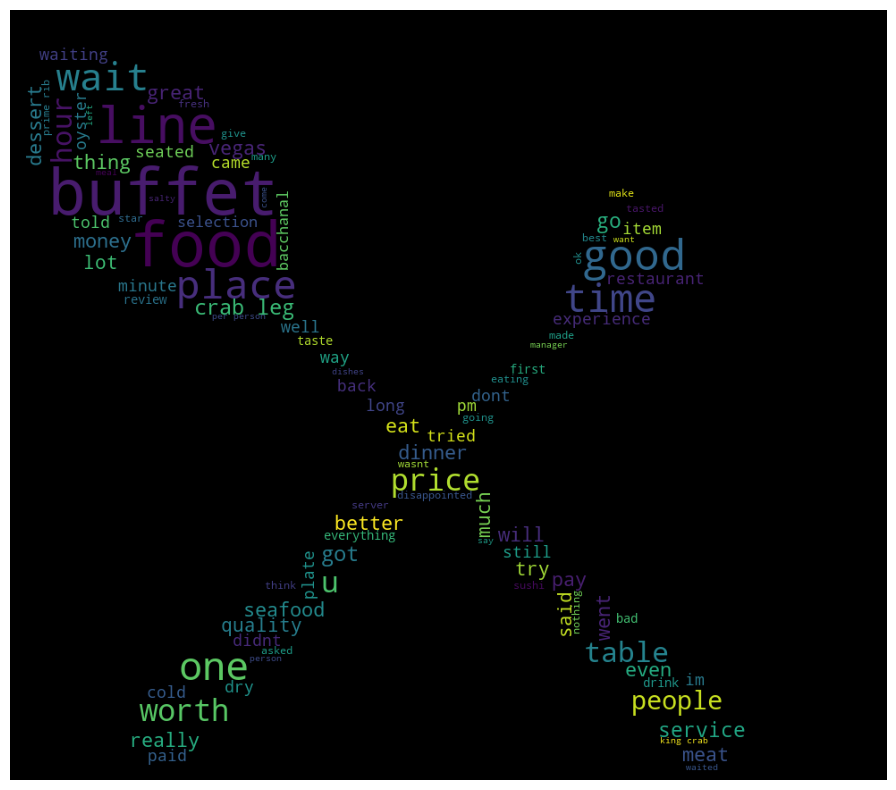

In [158]:
wc(negative_data,'black')

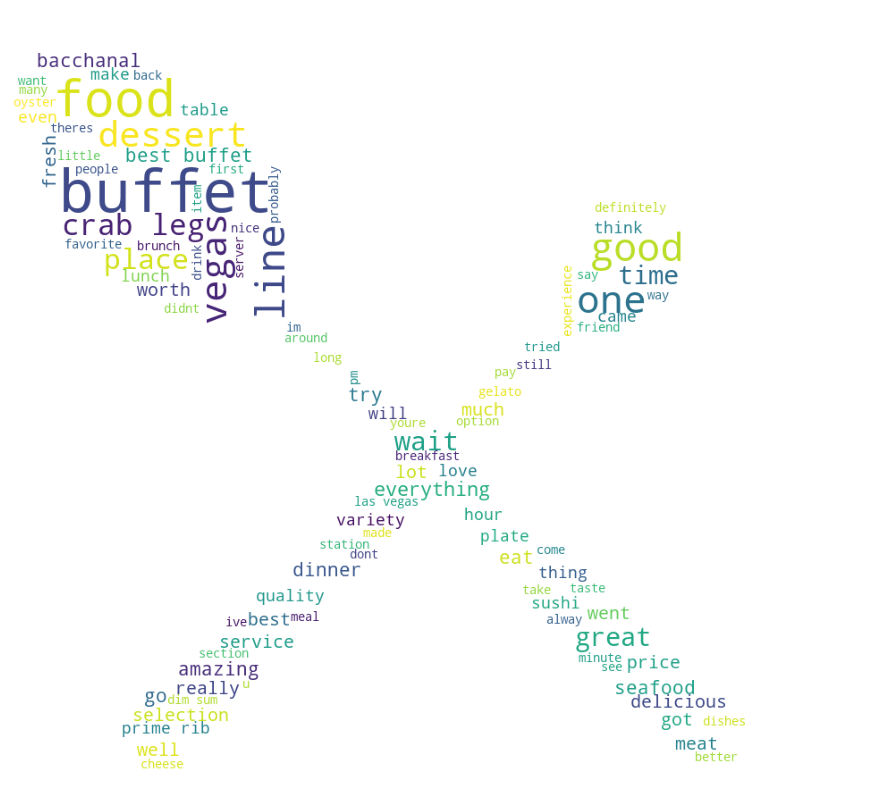

In [159]:
wc(positive_data,'white')

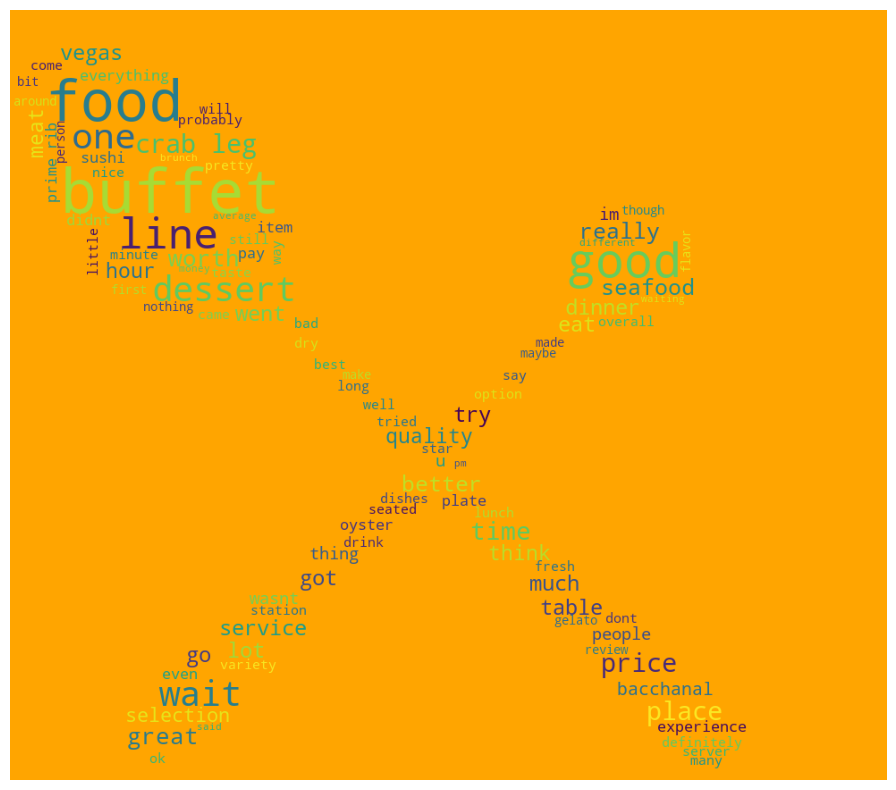

In [145]:
wc(neutral_data,'orange')